# Heart Disease Prediction using Machine Learning Approach


Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains the No. 1
cause of death in the US.The Heart Disease and Stroke Statistics—2019 Update from the **American Heart Association** indicates that:
* 116.4 million, or 46% of US adults are estimated to have hypertension. These are findings related to the new 2017 Hypertension Clinical Practice Guidelines.
* On average, someone dies of CVD every 38 seconds. About 2,303 deaths from CVD each day, based on 2016 data.
* On average, someone dies of a stroke every 3.70 minutes. About 389.4 deaths from stroke each day, based on 2016 data.

In this notebook i will try to unleash useful insights using this heart disease datasets and by building stacked ensemble model by combining the power of best performing machine learning algorithms.

This notebook is divided into 13 major steps which are as follows:

1. [Data description](#data-desc)
2. [Importing Libraries & setting up environment](#imp-lib)
3. [Loading dataset](#data-load)
4. [Data Cleaning & Preprocessing](#data-prep)
5. [Exploratory Data Analysis](#data-eda)
6. [OUtlier Detection & Removal](#data-out)
7. [Train Test Split and Hyper Paramater Tuning](#data-out)
8. [Model evaluation & comparison](#model-eval)<br>
9. [Model Evaluation](#model-inter)
10. [Feature Selection](#model-eval)<br>
11. [Remodelling and Feature Selection](#model-eval)<br>
12. [Conclusion](#data-conc)

## 1. Dataset description<a id='data-desc'></a>

This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

**1. Age:** Patients Age in years (Numeric)<br>
**2. Sex:** Gender of patient (Male - 1, Female - 0) (Nominal)<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non-        anginal pain, 4 asymptomatic (Nominal)<br>
**4. resting bp s:** Level of blood pressure at resting mode in mm/HG (Numerical)<br>
**5. cholestrol:** Serum cholestrol in mg/dl (Numeric)<br>
**6. fasting blood sugar:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)<br>
**7. resting ecg:** Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)<br>
**8. max heart rate:** Maximum heart rate achieved (Numeric)<br>
**9. exercise angina:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)<br>
**10. oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)<br>

#### Target variable
**12. target:** It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.

## 2. Importing Libraries<a id='imp-lib'></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

#normalization library
from sklearn.preprocessing import MinMaxScaler

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
from scipy import stats

#### xboost to be exported later


## 3. Loading Dataset<a id='data-load'></a>

In [2]:
df = pd.read_csv("C:\\Users\\laksh\\Desktop\\DAB304 Project\\dataset.csv")

In [3]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2.0,140,289.0,0,0,172.0,0,0.0,1,0
1,49,0,3.0,160,180.0,0,0,156.0,0,1.0,2,1
2,37,1,2.0,130,283.0,0,1,98.0,0,0.0,1,0
3,48,0,4.0,138,214.0,0,0,108.0,1,1.5,2,1
4,54,1,3.0,150,195.0,0,0,122.0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1236,45,1,1.0,110,NaN,0,0,132.0,0,1.2,2,1
1237,68,1,4.0,144,NaN,1,0,141.0,0,3.4,2,1
1238,57,1,4.0,130,NaN,0,0,115.0,1,1.2,2,1
1239,57,0,2.0,130,236.0,0,2,NaN,0,0.0,2,1


As we can see from above dataset entries some of the features should be nominal and to be encoded as their category type. In the next step we will be encoding features to their respective category as per the dataset description.

## 4. Data Cleaning & Preprocessing <a id='data-prep'></a>
 In this step we will first change the name of columns as some of the columns have weird naming pattern and then we will encode the features into categorical variables

In [4]:
# renaming features to proper name
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [5]:
# converting features to categorical features


df['chest_pain_type'][df['chest_pain_type']==1]== 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'


df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'



df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df["fasting_blood_sugar"] = df.fasting_blood_sugar.apply(lambda  x:'True' if x==1 else 'False')

df["exercise_induced_angina"] = df.exercise_induced_angina.apply(lambda  x:'Yes' if x==1 else 'No')


df["sex"] = df.sex.apply(lambda  x:'male' if x==1 else 'female')

In [6]:
## counting the value of different pain types
df['chest_pain_type'].value_counts()

asymptomatic        649
non-anginal pain    292
atypical angina     225
1.0                  71
Name: chest_pain_type, dtype: int64

In [7]:
## counting the value of different rest_ecg types
df['rest_ecg'].value_counts()

normal                          718
left ventricular hypertrophy    340
ST-T wave abnormality           183
Name: rest_ecg, dtype: int64

In [8]:
## counting the value of different st_slope types
df['st_slope'].value_counts()

flat           611
upsloping      545
downsloping     84
0                1
Name: st_slope, dtype: int64

In [9]:
## counting the value of different fasting_blood_sugar types
df['fasting_blood_sugar'].value_counts()

False    980
True     261
Name: fasting_blood_sugar, dtype: int64

In [10]:
## counting the value of different exercise_induced_angina types
df['exercise_induced_angina'].value_counts()

No     763
Yes    478
Name: exercise_induced_angina, dtype: int64

In [11]:
## deletin the value from st_slope having type 0. It was present in 517 index
df= df.drop([517],axis=0)


In [12]:
## counting the value of different st_slope types after cleaning
df['st_slope'].value_counts()

flat           611
upsloping      545
downsloping     84
Name: st_slope, dtype: int64

In [13]:
## checking the null values
df.isna().sum()

age                        0
sex                        0
chest_pain_type            4
resting_blood_pressure     0
cholesterol                5
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    2
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

In [14]:
## dropping null values from the dataset
df=df.dropna()

In [15]:
df.shape

(1230, 12)

In [16]:
## removing the duplicate data
df=df.drop_duplicates()

In [17]:
df.shape

(917, 12)

In [18]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                float64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved    float64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
target                       int64
dtype: object

## 5. Exploratory Data Analysis (EDA) <a id='data-eda'></a>

In [19]:
## summary statistics for numerical values
df.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,target
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.495093,132.377317,198.803708,136.814613,0.888332,0.552890
std,9.425601,18.515114,109.443764,25.473732,1.066749,0.497466
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


In [20]:
## summary statistics for categorical values
df.describe(include =[np.object])

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope
count,917,917,917,917,917,917
unique,2,4,2,3,2,3
top,male,asymptomatic,False,normal,No,flat
freq,724,496,704,551,546,459


### Analysis for Heart Patients

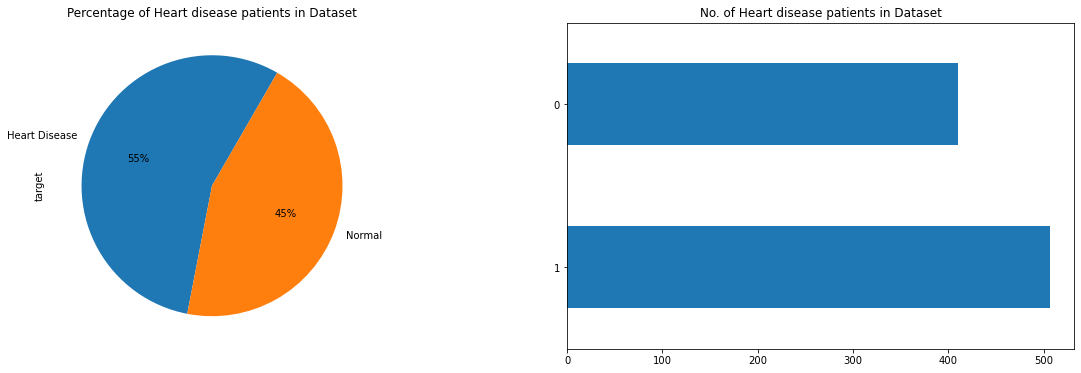

In [21]:
# Plotting attrition of employees
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(20,6))

axes[0] = df['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                 autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=axes[0]);

axes[0].set(title = 'Percentage of Heart disease patients in Dataset')

axes[1] = df["target"].value_counts().plot(kind="barh" ,ax =axes[1])

axes[1].set(title = 'No. of Heart disease patients in Dataset')


plt.show()

From above it can be seen that the data set is almost balanced as we ahve 55% of the data belonging to heart patients and 45% of the data belongs to people not having disease


### Analysis for Heart Patients Age Wise and Gender Wise

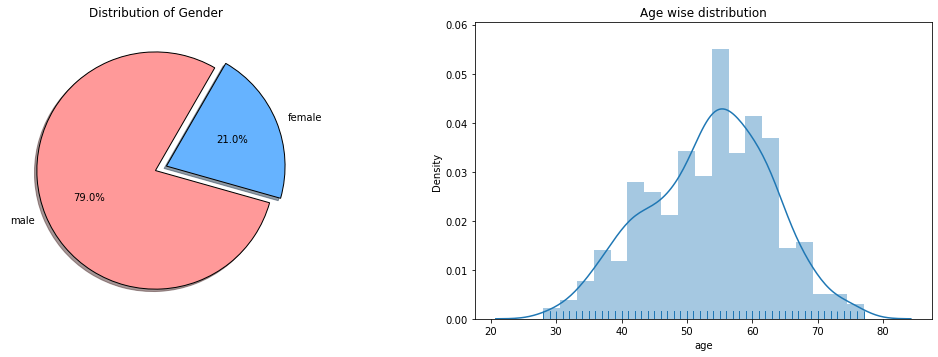

In [22]:
plt.figure(figsize=(18,12))
plt.subplot(221)


male=df.loc[df["sex"]=='male',].shape[0]
female=df.loc[df["sex"]=='female',].shape[0]
slices=[male,female]
labels=['male','female']

explode=[0,0.1]
colors = ['#ff9999','#66b3ff']

plt.pie(slices,labels=labels,explode=explode,shadow=True,colors=colors,startangle=60,autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'})


plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(df['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As seen from the analysis the count of male is more than three times the count of females. Also, if we look at the age than the data is normally distributed that means we have all the age values near about the mean value of the age

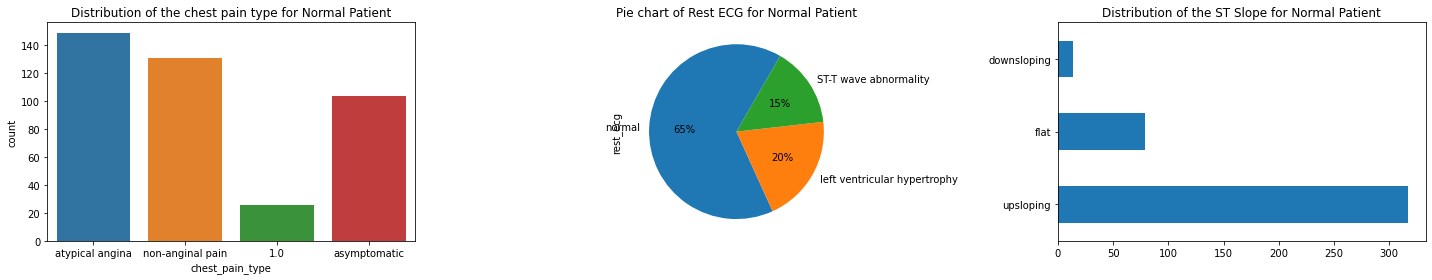

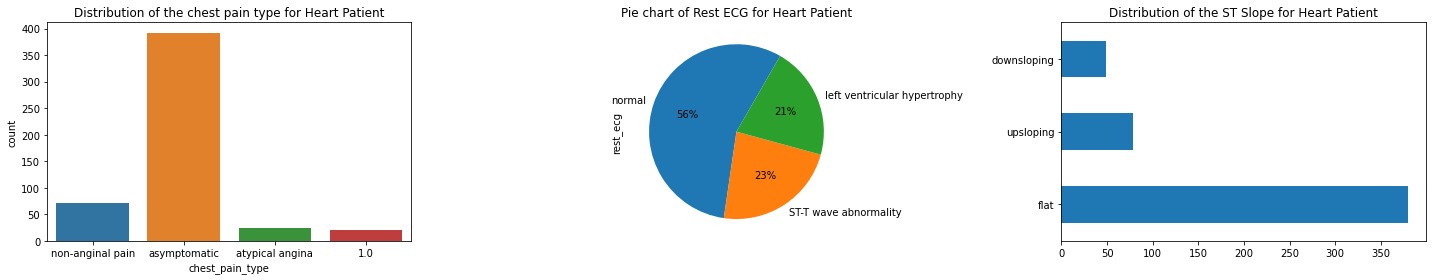

In [23]:
attr_0 = df[df['target']==0]
attr_1 = df[df['target']==1]

fig, axes = plt.subplots(1,3, figsize = (20,4))
sns.countplot(attr_0['chest_pain_type'],ax = axes[0])
attr_0['rest_ecg'].value_counts().plot.pie(autopct = "%1.0f%%", startangle = 60,ax=axes[1])
attr_0["st_slope"].value_counts().plot(kind="barh" ,ax =axes[2])

axes[0].set_title('Distribution of the chest pain type for Normal Patient')
axes[1].set_title('Pie chart of Rest ECG for Normal Patient')
axes[2].set_title('Distribution of the ST Slope for Normal Patient')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,3, figsize = (20,4))
sns.countplot(attr_1['chest_pain_type'],ax = axes[0])
attr_1['rest_ecg'].value_counts().plot.pie(autopct = "%1.0f%%", startangle = 60,ax=axes[1])
attr_1["st_slope"].value_counts().plot(kind="barh" ,ax =axes[2])


axes[0].set_title('Distribution of the chest pain type for Heart Patient')
axes[1].set_title('Pie chart of Rest ECG for Heart Patient')
axes[2].set_title('Distribution of the ST Slope for Heart Patient')
plt.tight_layout()
plt.show()



In [24]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True,)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)




target,0,1
chest_pain_type,,
1.000000,6.340000,3.940000
asymptomatic,25.370000,77.320000
atypical angina,36.340000,4.730000
non-anginal pain,31.950000,14.000000


As we can see from above plot **76%** of the chest pain type of the heart disease patients have asymptomatic chest pain. 

Asymptomatic heart attacks medically known as **silent myocardial infarction (SMI)** annually accounts for around 45-50% of morbidities due to cardiac ailments and even premature deaths in India. The incidences among middle aged people experiencing SMI is twice likely to develop in males than females. The symptoms of SMI being very mild in comparison to an actual heart attack; it is described as a silent killer. Unlike the symptoms in a normal heart attack which includes extreme chest pain, stabbing pain in the arms, neck & jaw, sudden shortness of breath, sweating and dizziness, the symptoms of SMI are very brief and hence confused with regular discomfort and most often ignored.

[reference](https://www.maxhealthcare.in/blogs/cardiology/rise-cases-asymptomatic-heart-attacks-amongst-middle-aged-people)

In [25]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True,)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.410000,9.660000
flat,19.270000,74.950000
upsloping,77.320000,15.380000


In [26]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,14.880000,23.080000
left ventricular hypertrophy,20.000000,20.910000
normal,65.120000,56.020000


![](https://i.ibb.co/R3V4tWC/heart1.png)
An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs. but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 52% heart disease patients have normal ECG

### Distribution of Numerical features

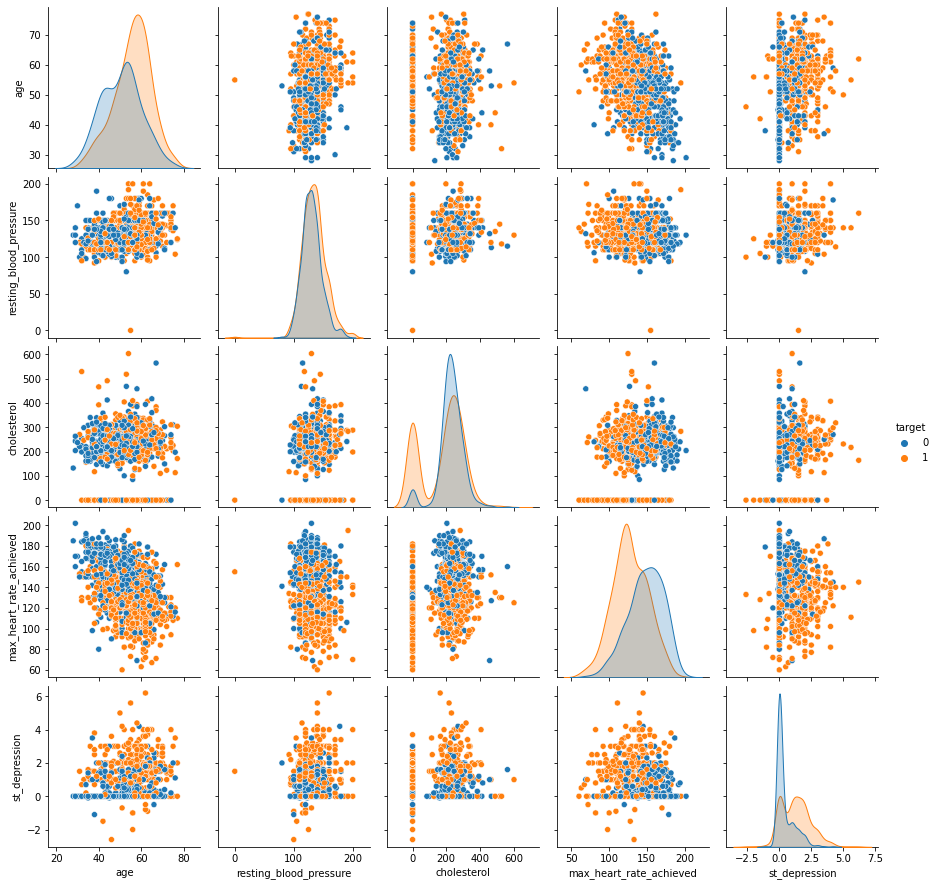

In [27]:
sns.pairplot(df, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol','max_heart_rate_achieved','st_depression'] )

From the above visulization it can be seen that as the age increases the heart rate count has increased.


### 6. Outlier Detection and Removal Using IQR

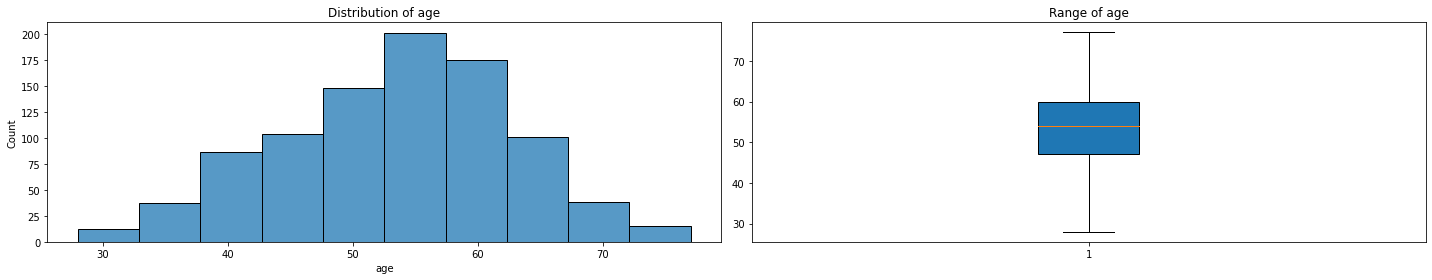

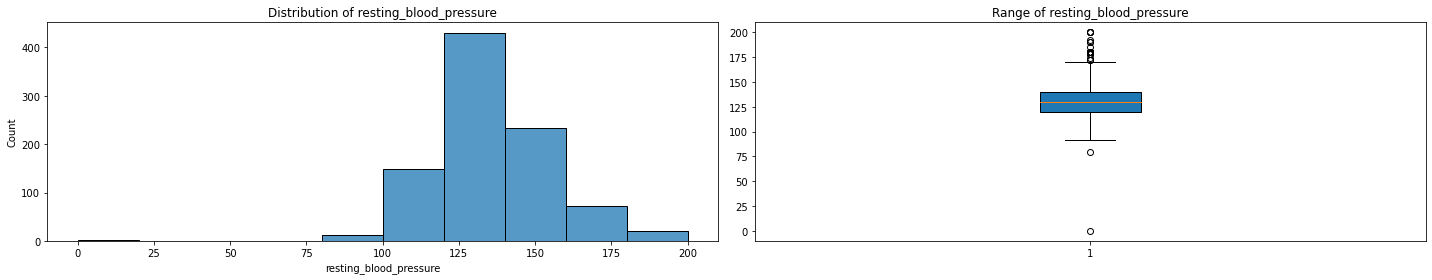

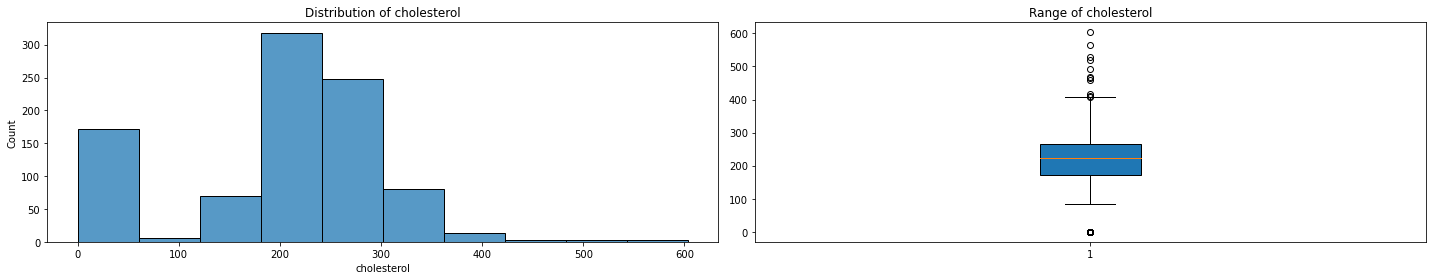

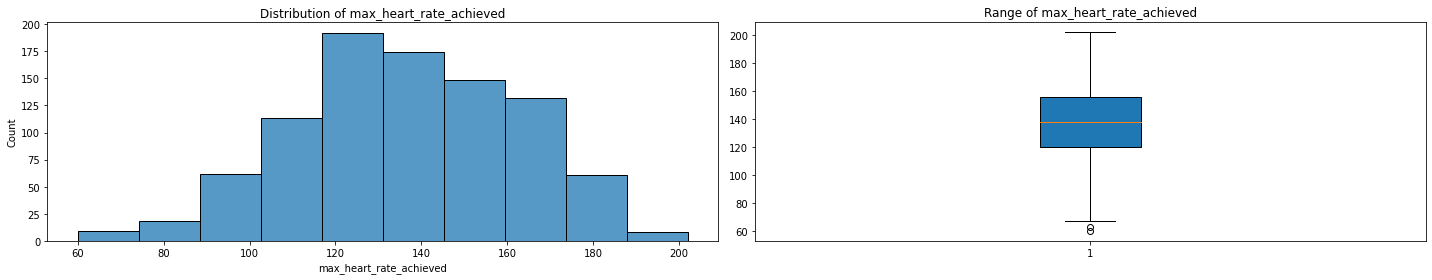

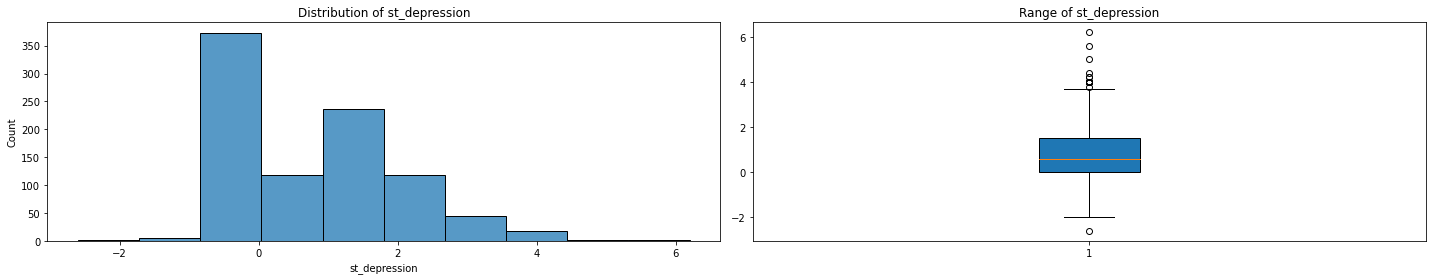

In [28]:
numeric = ['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']
for i in numeric:
    fig, axes = plt.subplots(1,2, figsize = (20,4))
    sns.histplot(df[i],bins = 10, ax = axes[0])
    plt.boxplot(df[i],patch_artist = True)
    axes[0].set_title('Distribution of '+i)
    axes[1].set_title('Range of '+i)
    plt.tight_layout()
    plt.show()

As seen from the above graphs that there are variables that have outliers and that should be removed so that model can be trained properly

In [29]:
## creating a dataframe from which outliers are to be removed
df1 = df[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [30]:
df.shape

(917, 12)

In [31]:
Q1_resting_blood_pressure= df.resting_blood_pressure.quantile(0.25)
Q1_resting_blood_pressure

Q3_resting_blood_pressure= df.resting_blood_pressure.quantile(0.75)
Q3_resting_blood_pressure
IQR_resting_blood_pressure=Q3_resting_blood_pressure-Q1_resting_blood_pressure
IQR_resting_blood_pressure
upperBound_resting_blood_pressure=Q3_resting_blood_pressure+1.5*IQR_resting_blood_pressure
lowerBound_resting_blood_pressure=Q1_resting_blood_pressure-1.5*IQR_resting_blood_pressure
print(upperBound_resting_blood_pressure)
print(lowerBound_resting_blood_pressure)


170.0
90.0


In [32]:
df.loc[df["resting_blood_pressure"]>upperBound_resting_blood_pressure,"resting_blood_pressure"]=Q3_resting_blood_pressure
df.loc[df["resting_blood_pressure"]<lowerBound_resting_blood_pressure,"resting_blood_pressure"]=Q1_resting_blood_pressure

In [33]:
Q1_cholesterol= df.cholesterol.quantile(0.25)
Q1_cholesterol

Q3_cholesterol= df.cholesterol.quantile(0.75)
Q3_cholesterol
IQR_cholesterol=Q3_cholesterol-Q1_cholesterol
IQR_cholesterol
upperBound_cholesterol=Q3_cholesterol+1.5*IQR_cholesterol
lowerBound_cholesterol=Q1_cholesterol-1.5*IQR_cholesterol
print(upperBound_cholesterol)
print(lowerBound_cholesterol)

408.0
32.0


In [34]:
df.loc[df["cholesterol"]>upperBound_cholesterol,"cholesterol"]=Q3_cholesterol
df.loc[df["cholesterol"]<lowerBound_cholesterol,"cholesterol"]=Q1_cholesterol

In [35]:
Q1_max_heart_rate_achieved= df.max_heart_rate_achieved.quantile(0.25)
Q1_max_heart_rate_achieved

Q3_max_heart_rate_achieved= df.max_heart_rate_achieved.quantile(0.75)
Q3_max_heart_rate_achieved
IQR_max_heart_rate_achieved=Q3_max_heart_rate_achieved-Q1_max_heart_rate_achieved
IQR_max_heart_rate_achieved
upperBound_max_heart_rate_achieved=Q3_max_heart_rate_achieved+1.5*IQR_max_heart_rate_achieved
lowerBound_max_heart_rate_achieved=Q1_max_heart_rate_achieved-1.5*IQR_max_heart_rate_achieved
print(upperBound_max_heart_rate_achieved)
print(lowerBound_max_heart_rate_achieved)

210.0
66.0


In [36]:
df=df.loc[~(df["max_heart_rate_achieved"]<lowerBound_max_heart_rate_achieved),]


In [37]:
Q1_st_depression= df.st_depression.quantile(0.25)
Q1_st_depression

Q3_st_depression= df.st_depression.quantile(0.75)
Q3_st_depression
IQR_st_depression=Q3_st_depression-Q1_st_depression
IQR_st_depression
upperBound_st_depression=Q3_st_depression+1.5*IQR_st_depression
lowerBound_st_depression=Q1_st_depression-1.5*IQR_st_depression
print(upperBound_st_depression)
print(lowerBound_st_depression)

3.75
-2.25


In [38]:
df.loc[df["st_depression"]>upperBound_st_depression,"st_depression"]=Q3_st_depression
df.loc[df["st_depression"]<lowerBound_st_depression,"st_depression"]=Q1_st_depression

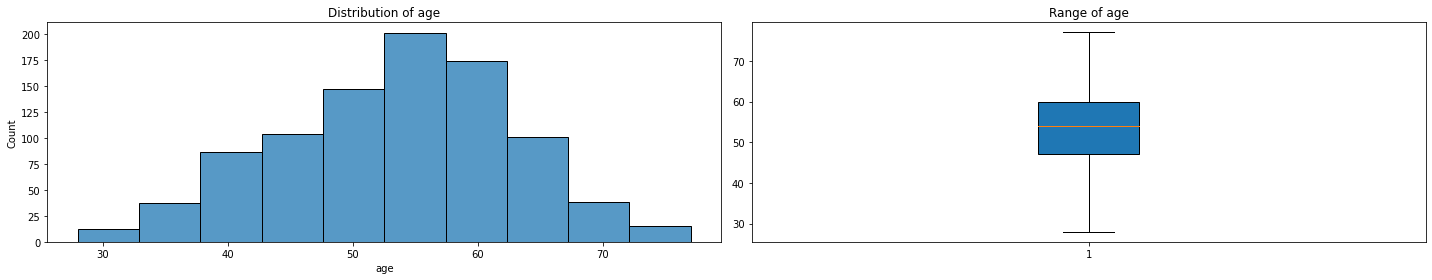

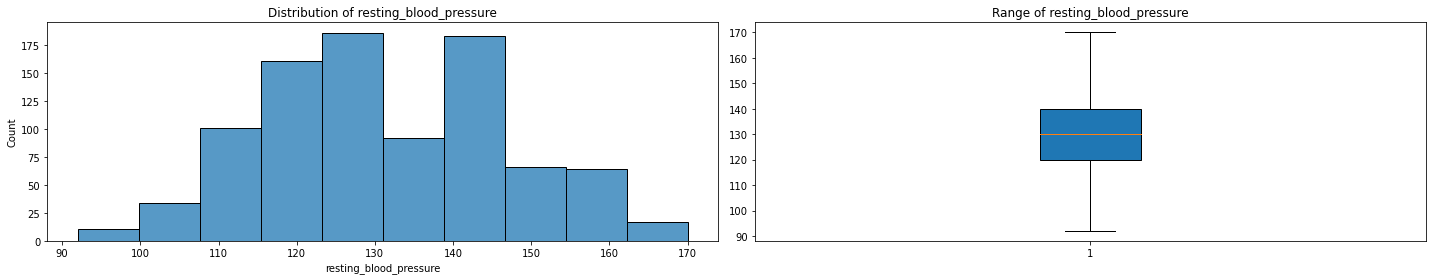

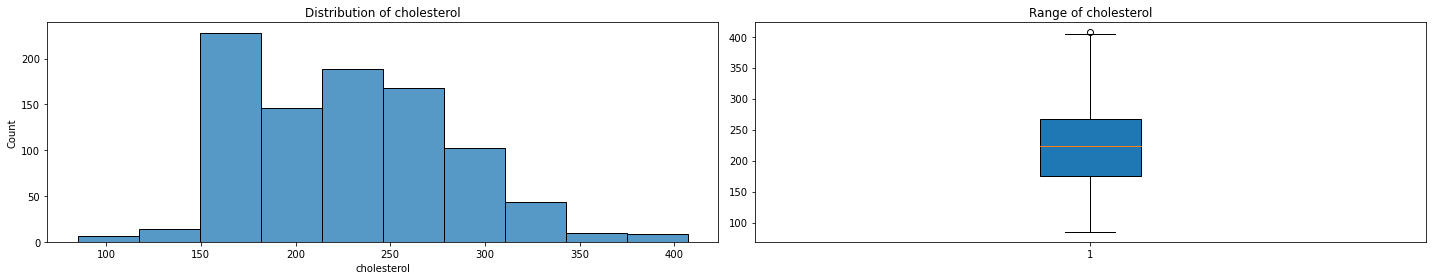

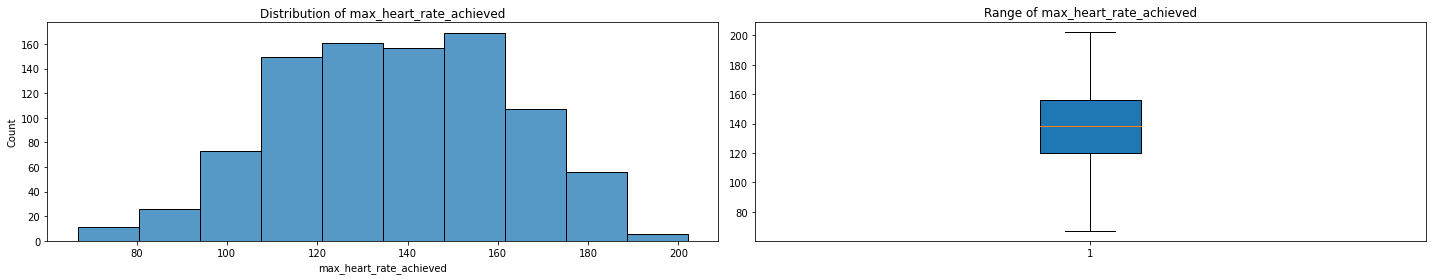

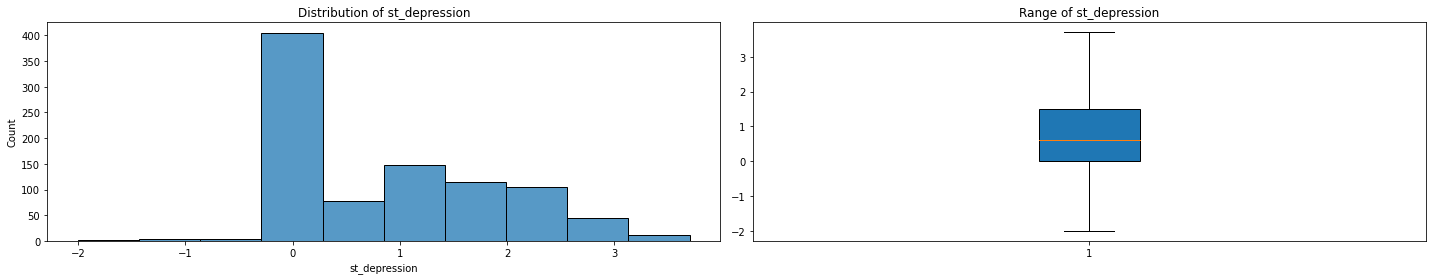

In [39]:
numeric = ['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']
for i in numeric:
    fig, axes = plt.subplots(1,2, figsize = (20,4))
    sns.histplot(df[i],bins = 10, ax = axes[0])
    plt.boxplot(df[i],patch_artist = True)
    axes[0].set_title('Distribution of '+i)
    axes[1].set_title('Range of '+i)
    plt.tight_layout()
    plt.show()

From the above visulization it is clear that outliers have mostly been removed and machine learning models can be implemented now.

### Before the machine learning is implemented, categories are converted into numerical using one hot encoding method

In [40]:
# one hot encoding method
df1 = pd.get_dummies(df)

In [41]:
# categorical data has been converted to numerical data. It can be seen from the shape of new dataframe(df1)
df1.shape


(915, 22)

### Undestanding corelation between target and response variable

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,sex_female,sex_male,chest_pain_type_1.0,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,fasting_blood_sugar_False,fasting_blood_sugar_True,rest_ecg_ST-T wave abnormality,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_No,exercise_induced_angina_Yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping
0,40,140,289.0,172.0,0.0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,1
1,49,160,180.0,156.0,1.0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
2,37,130,283.0,98.0,0.0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
3,48,138,214.0,108.0,1.5,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
4,54,150,195.0,122.0,0.0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,1


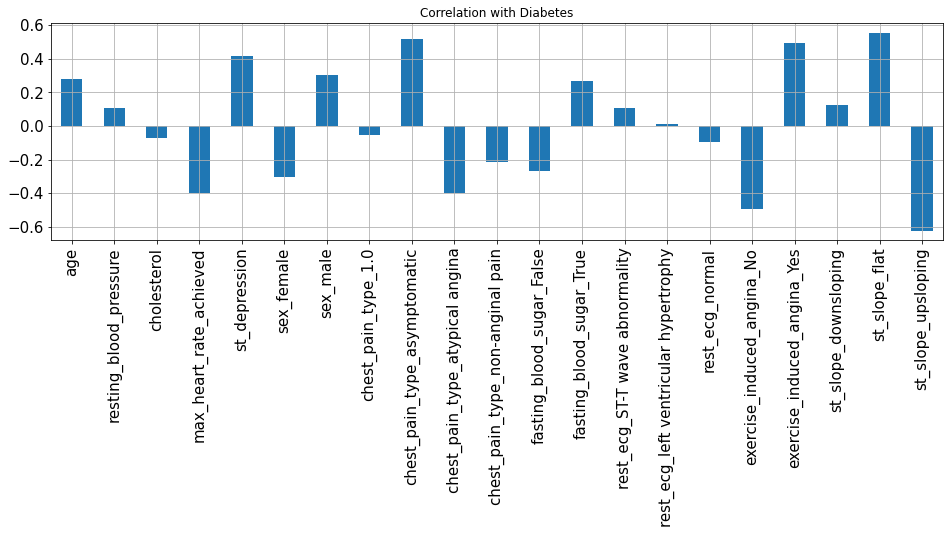

In [42]:
X = df1.drop(['target'],axis=1)
y = df1['target']

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,rot = 90, grid = True)

X.head()




Based on the above correlation graph it can be seen that chest_pain_type(asymptomatic), excercise_induced_angina(Yes) and st_slope (flat) are strongly related to target value( having an heart attack)

### Applying Normalization <a id='data-train'></a>

In [43]:
scaler=MinMaxScaler()
scaler_df=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
scaler_df

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,sex_female,sex_male,chest_pain_type_1.0,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,fasting_blood_sugar_False,fasting_blood_sugar_True,rest_ecg_ST-T wave abnormality,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_No,exercise_induced_angina_Yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping
0,0.244898,0.615385,0.633540,0.777778,0.350877,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.871795,0.295031,0.659259,0.526316,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.487179,0.614907,0.229630,0.350877,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.589744,0.400621,0.303704,0.614035,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.743590,0.341615,0.407407,0.350877,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.346939,0.230769,0.555901,0.481481,0.561404,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
911,0.816327,0.666667,0.335404,0.548148,0.947368,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
912,0.591837,0.487179,0.142857,0.355556,0.561404,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
913,0.591837,0.487179,0.468944,0.792593,0.350877,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### 7. Train Test Split and Hyper Parameter Tuning <a id='data-train'></a>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(scaler_df, y, test_size=0.3, random_state=10)

In [45]:
from sklearn import svm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': np.arange(1,11,1),
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': np.arange(1,11,1)
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': np.arange(1,11,1)
        }
        
    },
    'knn':{
        
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors': np.arange(1,11,1),
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Decision_Tree':{
        
        'model':DecisionTreeClassifier(),
        'params':{
            'max_depth': np.arange(1,11,1),
            'criterion':('gini','entropy'),
            'max_features':('auto','sqrt','log2'),
            'min_samples_split':[2,4,6],
            'random_state':np.arange(1,11,1)
        }
    }
    
    
}

In [46]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    


In [47]:
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,svm,0.859375,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.845313,{'n_estimators': 9}
2,logistic_regression,0.853125,{'C': 2}
3,knn,0.856250,"{'metric': 'manhattan', 'n_neighbors': 7}"
4,Decision_Tree,0.845313,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."


### 8. Model evaluation & comparison <a id='data-train'></a>

In [48]:
from sklearn import svm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### K nearest neighbour (metric= manhattan, n_neighbors= 7)

In [49]:
knn=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 7)
model=knn.fit(X_train, y_train)
pred_knn=model.predict(X_test)


### Support Vector Classifier (kernel=rbf, C=1)

In [50]:
svc = svm.SVC(kernel='rbf',C=1)
model=svc.fit(X_train, y_train)
pred_svc=model.predict(X_test)

### Logistic Regression (C=2)

In [51]:
LR=LogisticRegression(C=2)
model=LR.fit(X_train, y_train)
pred_LR=model.predict(X_test)

### Random Forrest (n_estimators=10)

In [52]:
RFC=RandomForestClassifier(n_estimators=10)
model=RFC.fit(X_train, y_train)
pred_RFC=model.predict(X_test)

### Decision Tree (criterion= 'entropy', max_depth= 5, max_features= 'auto', min_samples_split= 6,random_state=3)

In [53]:
DT = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, max_features= 'auto', min_samples_split= 6,random_state=3)
model=DT.fit(X_train, y_train)
pred_DT=model.predict(X_test)

## 9. Model Evaluation

 In this step we will first define which evaluation metrics we will use to evaluate our model. The most important evaluation metric for this problem domain is **sensitivity, specificity, Precision, F1-measure, Geometric mean and mathew correlation coefficient and finally ROC AUC curve**
 

### Log Loss
Logarithmic loss  measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. Log loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high log loss.

The graph below shows the range of possible log loss values given a true observation (isDog = 1). As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predications that are confident and wrong!

![](https://i.ibb.co/6BdDczW/log-loss.jpg)

### F1 Score

 F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

**F1 Score = 2*(Recall * Precision) / (Recall + Precision)**

In [54]:
final_results =pd.DataFrame([[1,2,3,4,5,6,7,8]],
               columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC','Log_Loss'])
model_pred = {        
                'KNN': pred_knn, 
                'SVC': pred_svc, 
                'LR': pred_LR,
                'RFC': pred_RFC, 
                'DT': pred_DT 
                 }
models_imp = pd.DataFrame(model_pred) 

for column in models_imp:
    CM=confusion_matrix(y_test,models_imp[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models_imp[column])
    acc= accuracy_score(y_test, models_imp[column])
    roc=roc_auc_score(y_test, models_imp[column])
    prec = precision_score(y_test, models_imp[column])
    rec = recall_score(y_test, models_imp[column])
    f1 = f1_score(y_test,models_imp[column])
    
            
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc,loss_log]],
              columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC','Log_Loss',])
    final_results = final_results.append(results,ignore_index = True)
    
final_results=final_results.drop([0],axis=0)
final_results


,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC,Log_Loss
1,KNN,0.865455,0.846626,0.920000,0.800,0.881789,0.860000,4.647108
2,SVC,0.872727,0.857143,0.920000,0.816,0.887460,0.868000,4.395911
3,LR,0.850909,0.847134,0.886667,0.808,0.866450,0.847333,5.149487
4,RFC,0.861818,0.883562,0.860000,0.864,0.871622,0.862000,4.772680
5,DT,0.872727,0.866242,0.906667,0.832,0.885993,0.869333,4.395905


## As seen from the above table , Support Vector and Decision Tree have shown the best accuracies

### 10. Feature Selection <a id='data-train'></a>

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [56]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(scaler_df,y)

In [57]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(scaler_df.columns)

In [58]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [59]:
featureScores.nlargest(15,'Score')

,Specs,Score
20,st_slope_upsloping,202.458579
19,st_slope_flat,140.664871
17,exercise_induced_angina_Yes,134.148177
9,chest_pain_type_atypical angina,119.426461
8,chest_pain_type_asymptomatic,112.731326
16,exercise_induced_angina_No,91.073074
5,sex_female,66.926870
12,fasting_blood_sugar_True,50.238141
10,chest_pain_type_non-anginal pain,32.811992
6,sex_male,17.890424


In [60]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(scaler_df,y)

ExtraTreesClassifier()

In [61]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[0.06367008 0.06558713 0.06768781 0.06941343 0.07556802 0.02315518
 0.02540229 0.00740632 0.08865394 0.02629995 0.0168     0.02372872
 0.02525026 0.01149265 0.01876048 0.01467114 0.057586   0.04693547
 0.0102625  0.11648882 0.14517979]


### Feature Importance <a id='data-train'></a>

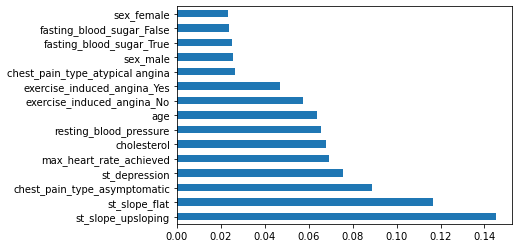

In [62]:
feat_importances = pd.Series(model.feature_importances_, index=scaler_df.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## From the above graph it can be seen that most contributing features are - 
1. **St_slope_upsloping**<br>
2. **Chest_pain_type_asymptomatic**<br>
3. **st_slope_flat**<br>
4. **st_depression**<br>
5. **Max_heart_rate_achieved**<br>

In [63]:
## creating a new input after dropping features that are not important

X_new= scaler_df.drop(['chest_pain_type_1.0','chest_pain_type_non-anginal pain','rest_ecg_ST-T wave abnormality',
 'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'st_slope_downsloping'], axis=1)

In [64]:
X_new

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,fasting_blood_sugar_False,fasting_blood_sugar_True,exercise_induced_angina_No,exercise_induced_angina_Yes,st_slope_flat,st_slope_upsloping
0,0.244898,0.615385,0.633540,0.777778,0.350877,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.428571,0.871795,0.295031,0.659259,0.526316,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.183673,0.487179,0.614907,0.229630,0.350877,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.589744,0.400621,0.303704,0.614035,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.530612,0.743590,0.341615,0.407407,0.350877,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.346939,0.230769,0.555901,0.481481,0.561404,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
911,0.816327,0.666667,0.335404,0.548148,0.947368,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
912,0.591837,0.487179,0.142857,0.355556,0.561404,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
913,0.591837,0.487179,0.468944,0.792593,0.350877,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


### 11. Remodeling after feature selection

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=10)

In [66]:
from sklearn import svm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': np.arange(1,11,1),
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': np.arange(1,11,1)
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': np.arange(1,11,1)
        }
        
    },
    'knn':{
        
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors': np.arange(1,11,1),
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Decision_Tree':{
        
        'model':DecisionTreeClassifier(),
        'params':{
            'max_depth': np.arange(1,11,1),
            'criterion':('gini','entropy'),
            'max_features':('auto','sqrt','log2'),
            'min_samples_split':[2,4,6],
            'random_state':np.arange(1,11,1)
        }
    }
    
    
}

In [67]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [68]:
df3 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df3.to_csv('abcc.csv')

In [69]:
from sklearn import svm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### K nearest neighbour (metric= manhattan, n_neighbors= 10)

In [70]:
knn=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 10)
model_knn=knn.fit(X_train, y_train)
pred_knn2=model_knn.predict(X_test)
prob_knn2=model_knn.predict_proba(X_test) [::,1]

### Support Vector Classifier (kernel=rbf, C=2)

In [71]:
svc = svm.SVC(kernel='rbf',C=2,probability=True)
model_svc=svc.fit(X_train, y_train)
pred_svc2=model_svc.predict(X_test)
prob_svc2=model_svc.predict_proba(X_test) [::,1]

### Logistic Regression (C=1)

In [72]:
LR=LogisticRegression(C=1)
model_LR=LR.fit(X_train, y_train)
pred_LR2=model_LR.predict(X_test)
prob_LR2=model_LR.predict_proba(X_test) [::,1]

### Random Forrest (n_estimators=7)

In [73]:
RFC=RandomForestClassifier(n_estimators=7)
model_RFC=RFC.fit(X_train, y_train)
pred_RFC2=model_RFC.predict(X_test)
prob_RFC2=model_RFC.predict_proba(X_test) [::,1]

### Decision Tree (criterion= 'entropy', max_depth= 6, max_features= 'auto', min_samples_split= 6,random_state=5)

In [74]:
DT = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, max_features= 'auto', min_samples_split= 6,random_state=5)
model_DT=DT.fit(X_train, y_train)
pred_DT2=model_DT.predict(X_test)
prob_DT2=model_DT.predict_proba(X_test) [::,1]

# Model Revaluation

In [75]:
final_results =pd.DataFrame([[1,2,3,4,5,6,7,8]],
               columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC','Log_Loss'])
model_pred = {        
                'KNN': pred_knn, 
                'SVC': pred_svc, 
                'LR': pred_LR,
                'RFC': pred_RFC, 
                'DT': pred_DT 
                 }
models_imp = pd.DataFrame(model_pred) 

for column in models_imp:
    CM=confusion_matrix(y_test,models_imp[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models_imp[column])
    acc= accuracy_score(y_test, models_imp[column])
    roc=roc_auc_score(y_test, models_imp[column])
    prec = precision_score(y_test, models_imp[column])
    rec = recall_score(y_test, models_imp[column])
    f1 = f1_score(y_test,models_imp[column])
    
            
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc,loss_log]],
              columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC','Log_Loss',])
    final_results = final_results.append(results,ignore_index = True)
    
final_results=final_results.drop([0],axis=0)
final_results

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC,Log_Loss
1,KNN,0.865455,0.846626,0.920000,0.800,0.881789,0.860000,4.647108
2,SVC,0.872727,0.857143,0.920000,0.816,0.887460,0.868000,4.395911
3,LR,0.850909,0.847134,0.886667,0.808,0.866450,0.847333,5.149487
4,RFC,0.861818,0.883562,0.860000,0.864,0.871622,0.862000,4.772680
5,DT,0.872727,0.866242,0.906667,0.832,0.885993,0.869333,4.395905


### 12. Conclusion

# As it can be seen, after the feature selection is done and model is reapplied the best performance is seen by Support vectors as it has the maximum accuracy and F1 score

### Most contributing features are - 
1. **St_slope_upsloping**<br>
2. **Chest_pain_type_asymptomatic**<br>
3. **st_slope_flat**<br>
4. **st_depression**<br>
5. **Max_heart_rate_achieved**<br>

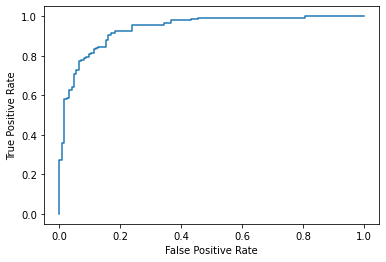

In [76]:
fpr, tpr, _ = metrics.roc_curve(y_test, prob_LR2)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

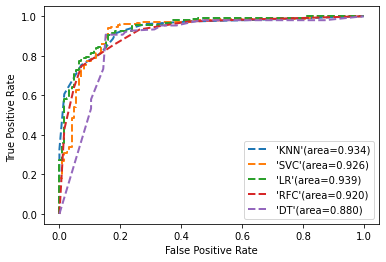

In [132]:
def roc(y_test,prob,label=''):
    from sklearn.metrics import roc_curve, auc
    fpr,tpr,threshold = roc_curve(y_test,prob)
    auc = auc(fpr,tpr)
    plt.plot(fpr, tpr,linestyle='--', linewidth=2.0,label="%la(area=%.3f)"%(label,auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate ')
    plt.legend()


roc(y_test,prob_knn2,'KNN')
roc(y_test,prob_svc2,'SVC')
roc(y_test,prob_LR2,'LR')
roc(y_test,prob_RFC2,'RFC')
roc(y_test,prob_DT2,'DT')









In [133]:
def rocc(y_test,prob,label=''):
    from sklearn.metrics import roc_curve, auc
    fpr,tpr,threshold = roc_curve(y_test,prob)
    auc = auc(fpr,tpr)
    plt.plot(fpr, tpr,linestyle='--', linewidth=2.0,label="%la(area=%.3f)"%(label,auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate ')
    plt.legend()

In [159]:
from sklearn.metrics import roc_curve, auc
fpr1,tpr1,threshold = roc_curve(y_test,prob_knn2)
auc1 = auc(fpr1,tpr1)
fpr2,tpr2,threshold = roc_curve(y_test,prob_svc2)
auc2 = auc(fpr2,tpr2)
fpr3,tpr3,threshold = roc_curve(y_test,prob_LR2)
auc3 = auc(fpr3,tpr3)
fpr4,tpr4,threshold = roc_curve(y_test,prob_RFC2)
auc4 = auc(fpr4,tpr4)
fpr5,tpr5,threshold = roc_curve(y_test,prob_DT2)
auc5 = auc(fpr5,tpr5)



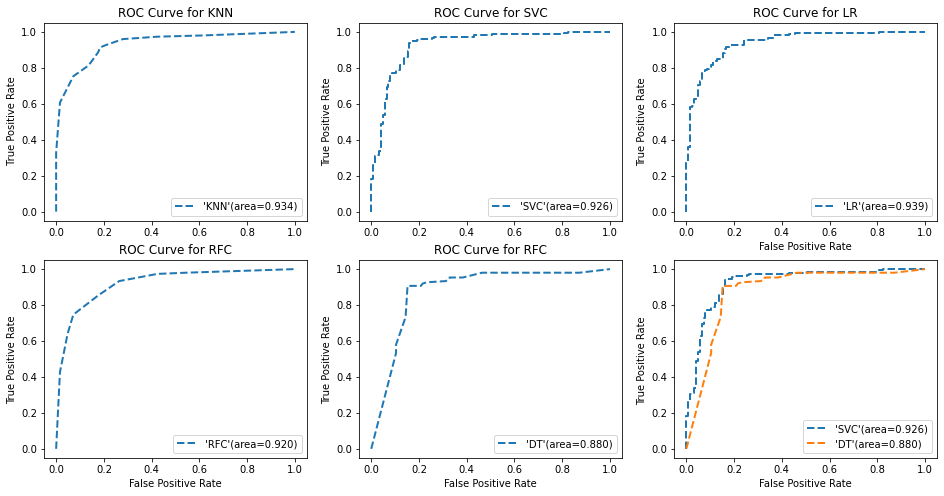

In [160]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
label= ['KNN','SVC','LR','RFC','DT']
axes[0,0].plot(fpr1, tpr1, linestyle='--', linewidth=2.0,label="%la(area=%.3f)"%(label[0],auc1))
#axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel(' True Positive Rate')
axes[0,0].legend();
axes[0,0].set_title('ROC Curve for KNN')
axes[0,1].plot(fpr2, tpr2, linestyle='--', linewidth=2.0,label="%la(area=%.3f)"%(label[1],auc2))
#axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].legend();
axes[0,1].set_title('ROC Curve for SVC')

axes[0,2].plot(fpr3, tpr3, linestyle='--', linewidth=2.0,label="%la(area=%.3f)"%(label[2],auc3))
axes[0,2].set_xlabel('False Positive Rate')
axes[0,2].set_ylabel('True Positive Rate')
axes[0,2].legend();
axes[0,2].set_title('ROC Curve for LR')

axes[1,0].plot(fpr4, tpr4, linestyle='--', linewidth=2.0,label="%la(area=%.3f)"%(label[3],auc4))
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].legend();
axes[1,0].set_title('ROC Curve for RFC')
axes[1,1].plot(fpr5, tpr5, linestyle='--', linewidth=2.0,label="%la(area=%.3f)"%(label[4],auc5))
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].legend();
axes[1,1].set_title('ROC Curve for RFC')
#roc(y_test,prob_knn2,'KNN')
roc(y_test,prob_svc2,'SVC')
#roc(y_test,prob_LR2,'LR')
#roc(y_test,prob_RFC2,'RFC')
roc(y_test,prob_DT2,'DT')